In [2]:
import numpy as np
import scipy
from astropy.table import Table
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [12]:
data = Table.read("/Users/guadalupecanasherrera/DDM2017/Datasets/x-vs-y-for-PCA.csv")

In [66]:
y_prime = (data['y']-np.mean(data['y']))/np.std(data['y'])
x_prime = (data['x']-np.mean(data['x']))/np.std(data['x'])

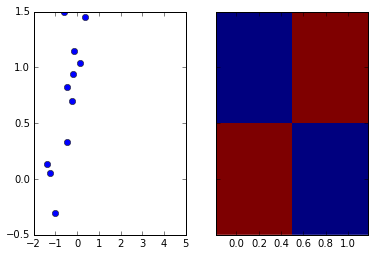

In [48]:
XY = np.vstack([x_prime, y_prime])
cov_mat = np.cov(XY)
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(data['x'], data['y'], 'o')
ax2.imshow(cov_mat, origin = 'lower', interpolation='none')
#The matrix should be positive and have elements out of the diagonal

[[ 1.02564103  0.99718328]
 [ 0.99718328  1.02564103]]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


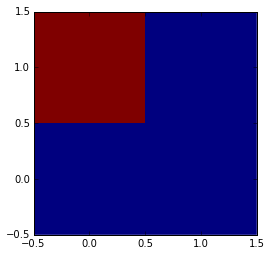

In [63]:
#Let's calculate los eigenvalues and eigenvectors 
w, v = LA.eig(cov_mat)
print cov_mat
print v.real
plt.imshow(v.real, origin="lower", interpolation='none')

[ 0.02845774  2.02282431]


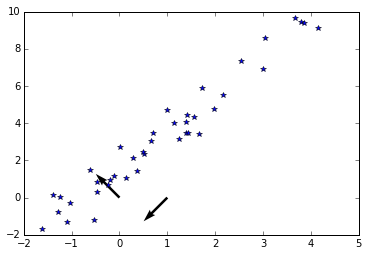

In [79]:
plt.plot(data['x'], data['y'], '*')
plt.quiver(v[0], v[1], scale=10)
print w

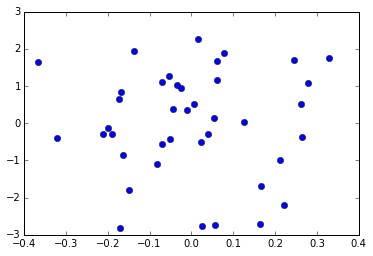

In [83]:
pcs = np.zeros((2, len(data)))
for i in range(len(x_prime)):
    pcs[:, i] = np.matmul(v.T, np.array([x_prime[i], y_prime[i]]).T)
plt.plot(pcs[0], pcs[1], 'o')

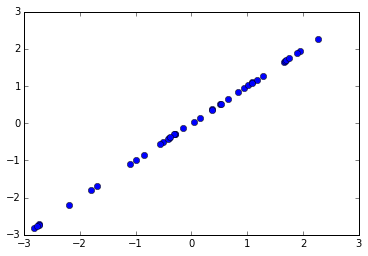

In [84]:
pcs_1 = np.zeros((2, len(data)))
for i in range(len(x_prime)):
    pcs_1[:, i] = np.matmul(v[0].T, np.array([x_prime[i], y_prime[i]]).T)
plt.plot(pcs_1[0], pcs_1[1], 'o')

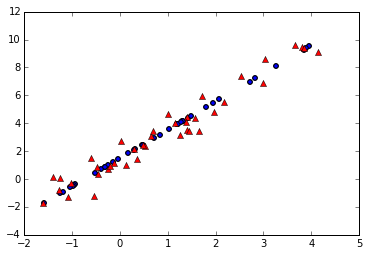

In [110]:
x_back = pcs_1*v[0][0]*np.std(data['x']) + np.mean(data['x'])
y_back = pcs_1*v[0][1]*np.std(data['y']) + np.mean(data['y'])
plt.scatter(x_back, y_back)
plt.plot(data['x'], data['y'], 'r^')



In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [99]:
pca = PCA(whiten = False, n_components=2)

In [102]:
X = np.vstack([data['x'], data['y']]).T
scl = StandardScaler()
Xs = scl.fit_transform(X)

In [103]:
pca.fit(Xs)

PCA(copy=True, n_components=2, whiten=False)

In [108]:
ev1_1, ev2_1 = zip(*pca.components_.T)
ev1_1, ev2_1

((0.70710678118654746, 0.70710678118654746),
 (-0.70710678118654746, 0.70710678118654746))

[ 0.17352675 -0.64848272]


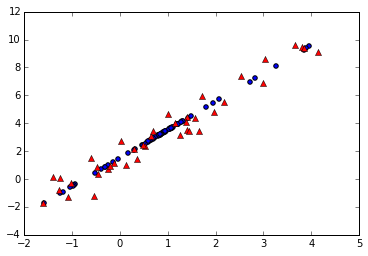

In [141]:
Xs_back = pca.inverse_transform(Xs)
print Xs_back[0]
plt.scatter(Xs_back*ev1_1[0]*np.std(data['x']) + np.mean(data['x']), Xs_back*ev1_1[1]*np.std(data['y']) + np.mean(data['y']))
plt.plot(data['x'], data['y'], 'r^')